In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
file_path = "/Users/abagavetdinova/Desktop/лаба/first_test/sequences.csv"  

In [64]:

df = pd.read_csv(file_path) 
df

,Accession,BioSample,Organism_Name,Species,Genus,Family,Genotype,Isolate,Length,Nuc_Completeness,Geo_Location,Country,Host,Tissue_Specimen_Source,Submitters,Collection_Date,Release_Date,Molecule_type
0,NC_043096,NaN,Bottlenose dolphin astrovirus 1,Mamastrovirus tursiopis,Mamastrovirus,Astroviridae,NaN,NaN,3990,complete,USA,USA,Tursiops truncatus,feces,NaN,2007,2019-06-28,ssRNA(+)
1,NC_043097,NaN,Mamastrovirus 11,Mamastrovirus californiani,Mamastrovirus,Astroviridae,NaN,NaN,3179,complete,USA,USA,Zalophus californianus,feces,NaN,2006,2019-06-28,ssRNA(+)
2,NC_043098,NaN,Bat astrovirus Tm/Guangxi/LD71/2007,Mamastrovirus vespertilionis,Mamastrovirus,Astroviridae,NaN,LD71,3975,complete,China:Guangxi,China,Taphozous melanopogon,NaN,NaN,2007-06-08,2019-06-28,ssRNA(+)
3,NC_043099,NaN,Mamastrovirus 14,Mamastrovirus miniopteri,Mamastrovirus,Astroviridae,NaN,AFCD57,3371,complete,China: Hong Kong,China,Miniopterus magnater,NaN,"Chu,D.K.W., Poon,L.L.M., Guan,Y., Peiris,J.S.M.",2005,2019-06-28,ssRNA(+)
4,NC_043100,NaN,Bat astrovirus Tm/Guangxi/LD77/2007,Mamastrovirus taphozoi,Mamastrovirus,Astroviridae,NaN,LD77,3875,complete,China:Guangxi,China,Taphozous melanopogon,NaN,NaN,2007-06-08,2019-06-28,ssRNA(+)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15777,M87668,NaN,Human astrovirus 1,Mamastrovirus hominis,Mamastrovirus,Astroviridae,NaN,NaN,1034,partial,NaN,NaN,NaN,NaN,"Willcocks,M.M., Carter,M.J.",NaN,1993-08-02,ssRNA(+)
15778,L06802,NaN,Human astrovirus 2,Mamastrovirus hominis,Mamastrovirus,Astroviridae,NaN,NaN,2484,partial,NaN,NaN,NaN,NaN,"Monroe,S.S., Jiang,B., Stine,S.E., Koopmans,M....",NaN,1993-07-26,ssRNA(+)
15779,S47249,NaN,Human astrovirus 1,Mamastrovirus hominis,Mamastrovirus,Astroviridae,NaN,NaN,118,partial,NaN,NaN,NaN,NaN,"Major,M.E., Eglin,R.P., Easton,A.J.",NaN,1993-05-08,ssRNA(+)
15780,Z16420,NaN,Human astrovirus 1,Mamastrovirus hominis,Mamastrovirus,Astroviridae,NaN,NaN,827,partial,NaN,NaN,NaN,NaN,"Willcocks,M.M., Carter,M.J., Silcock,J.G., Mad...",NaN,1992-10-07,ssRNA(+)


In [65]:
count_mmstr = (df["Genus"] == "Mamastrovirus").sum() #количество записей по Mamastrovirus
print(count_mmstr)

8179


In [66]:
count_avstr = (df["Genus"] == "Avastrovirus").sum() #количество записей по Avastrovirus
print(count_avstr)

2166


In [67]:
count_empty = df["Genus"].isna().sum() #количество записей с пустым полем - неклассифицированные 
print(count_empty)

5437


Строим распределение длин у Астровирусов 

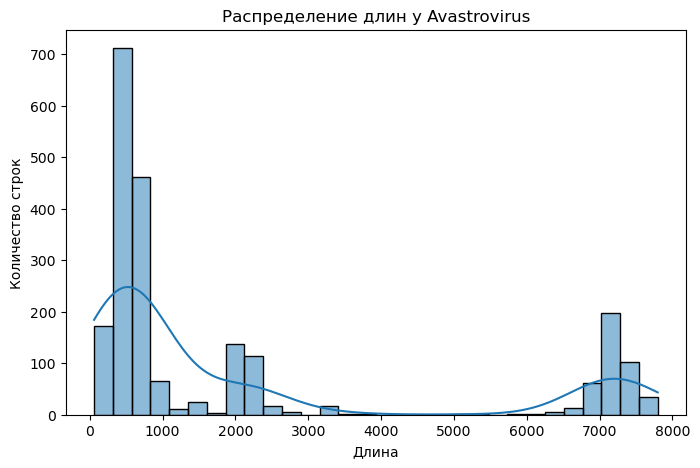

In [68]:
subset = df[df["Genus"] == "Avastrovirus"]
plt.figure(figsize=(8,5))
sns.histplot(subset["Length"], bins=30, kde=True) 
plt.xlabel("Длина")
plt.ylabel("Количество строк")
plt.title("Распределение длин у Avastrovirus")
plt.show()

Строим распределение длин генома Авастровирусов с "полным" геномом

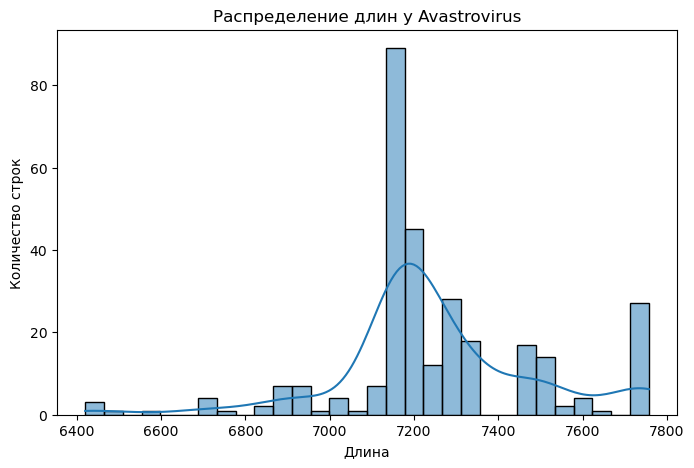

In [72]:
subset = df[(df["Genus"] == "Avastrovirus") & (df['Nuc_Completeness'] == 'complete')]
plt.figure(figsize=(8,5))
sns.histplot(subset["Length"], bins=30, kde=True) 
plt.xlabel("Длина")
plt.ylabel("Количество строк")
plt.title("Распределение длин у Avastrovirus")
plt.show()

На мой взгляд, оценить размер генома можно как - от 6800 до 7800 п.н (в литературе говорится про длину в 6,6–7,7 тыс)

Строим распределение длин у неклассифицированных вирусов 

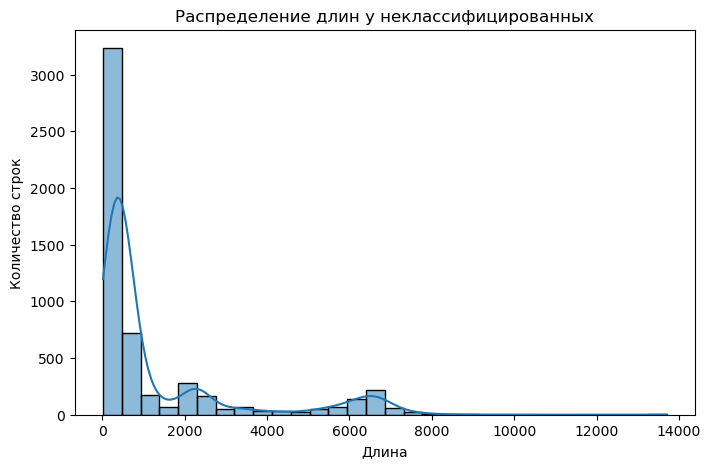

In [60]:
subset = df[df["Genus"].isna()]
plt.figure(figsize=(8,5))
sns.histplot(subset["Length"], bins=30, kde=True) 
plt.xlabel("Длина")
plt.ylabel("Количество строк")
plt.title("Распределение длин у неклассифицированных")
plt.show()

То же самое с "полным" геномом 

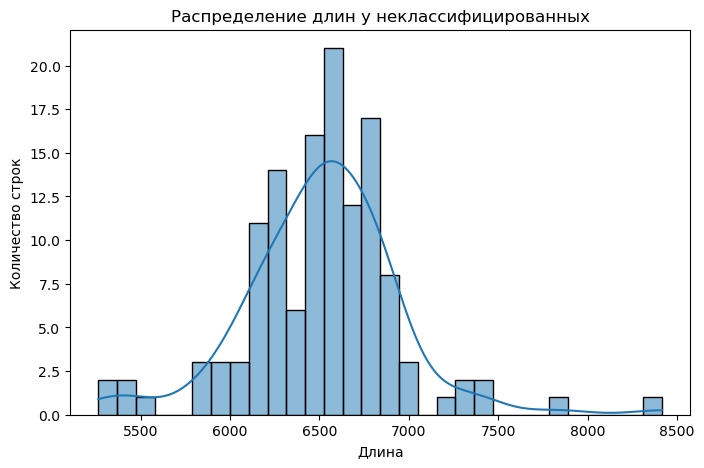

In [73]:
subset = df[(df["Genus"].isna())& (df['Nuc_Completeness'] == 'complete') ]
plt.figure(figsize=(8,5))
sns.histplot(subset["Length"], bins=30, kde=True) 
plt.xlabel("Длина")
plt.ylabel("Количество строк")
plt.title("Распределение длин у неклассифицированных")
plt.show()

Ну красиво! Длина от 5500 до 7500 нп - разброс больше

In [75]:
df["Organism_Name"].unique() #уникальные названия 

array(['Bottlenose dolphin astrovirus 1', 'Mamastrovirus 11',
       'Bat astrovirus Tm/Guangxi/LD71/2007', 'Mamastrovirus 14',
       'Bat astrovirus Tm/Guangxi/LD77/2007', 'Mamastrovirus 16',
       'Mamastrovirus 18', 'Bat astrovirus Tm/Guangxi/LD38/2007',
       'Astrovirus dogfaeces/Italy/2005', 'Culex Bastrovirus-like virus',
       'Bat astrovirus Hp/Guangxi/LC03/2007', 'Sichuan takin astrovirus',
       'Rodent astrovirus', 'Bastrovirus 7',
       'Bastrovirus/VietNam/Bat/16715_78', 'Mamastrovirus 2',
       'California sea lion astrovirus 2', 'Goose astrovirus',
       'Qinghai Himalayan marmot astrovirus 1',
       'Qinghai Himalayan marmot astrovirus 2',
       'Bastrovirus/VietNam/Porcine/17489_85',
       'Bastrovirus-like_virus/VietNam/Bat/17819_21',
       'Bastrovirus/VietNam/Rat/16715_10', 'Mamastrovirus 1',
       'Dromedary astrovirus', 'Astrovirus Er/SZAL6/HUN/2011',
       'Canine astrovirus', 'Rabbit astrovirus TN/2208/2010',
       'Mamastrovirus 3', 'Feline astr

In [76]:
subset_2 = df[df["Genus"] == "Avastrovirus"]
subset_2['Host'].unique()

array(['Anser', 'Anatidae', nan, 'Meleagris gallopavo', 'Anser sp.',
       'Gallus gallus', 'Anser anser', 'Sus scrofa',
       'Canis lupus familiaris', 'Aythya fuligula', 'Mareca strepera',
       'Cairina moschata', 'Neogale vison', 'Corvus cornix',
       'Passer montanus', 'Corvus frugilegus', 'Anas platyrhynchos',
       'Mareca falcata', 'Columba livia', 'Chroicocephalus ridibundus',
       'Hierococcyx sparverioides', 'Turdus dissimilis',
       'Phasianus colchicus', 'Streptopelia orientalis', 'Anas crecca',
       'Aythya marila', 'Anas acuta', 'Hydroprogne caspia',
       'Merops apiaster', 'Hirundo rustica', 'Coloeus monedula',
       'Anser indicus', 'Spatula clypeata', 'Cygnus olor',
       'Corvus splendens', 'Spilopelia chinensis', 'Columbidae', 'Aves',
       'Accipiter nisus', 'Calidris ruficollis',
       'Malacorhynchus membranaceus', 'Phasianinae',
       'Recurvirostra novaehollandiae', 'Marmota himalayana',
       'Anous tenuirostris', 'Felis catus', 'Macaca mul

Хозяева авастровирусов - большинство птиц, но встречаются и млеки (человек, собака, кошка, свинья, норки, обезьяна)

In [77]:
subset_3 = df[df["Genus"].isna()]
subset_3['Host'].unique()

array([nan, 'Budorcas taxicolor tibetana', 'Homo sapiens', 'Chiroptera',
       'Sus scrofa', 'Rattus', 'Coracias garrulus', 'Bos taurus',
       'Mus musculus', 'Vulpes vulpes', 'Myotis ciliolabrum',
       'Leucogeranus leucogeranus', 'Anser sp.', 'Capra hircus',
       'Crocidura dracula', 'Crocidura attenuata', 'Uropsilus gracilis',
       'Crocidura suaveolens', 'Anourosorex squamipes',
       'Episoriculus caudatus', 'Suncus murinus', 'Sus scrofa domesticus',
       'Canis lupus familiaris', 'Cebus cuscinus', 'Rattus norvegicus',
       'Cricetulus longicaudatus', 'Phocarctos hookeri',
       'Miniopterus fraterculus', 'Scotophilus dinganii',
       'Rattus tanezumi', 'Miniopterus inflatus', 'Mus setulosus',
       'Hemidactylus frenatus', 'Gekko chinensis',
       'Mormopterus francoismoutoui', 'Columba livia', 'Rattus rattus',
       'Nyctereutes procyonoides', 'Miniopterus fuliginosus',
       'Rhinolophus ferrumequinum', 'Myotis macrodactylus',
       'Urva auropunctata', 'Ne

In [78]:
subset_3['Host'].isna().sum()

np.int64(740)